## Import revelant dependencies

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Since I am going to create a model based on the comment length I'm going to use the larger df to get my values for the comment length and test it on the smaller df

In [9]:
test = pd.read_csv('data/small_sample.csv')
df = pd.read_csv('data/large_sample.csv')

In [10]:
test.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

## For this model I will take the ceiling of each rating to get rid of decimal places for easier matching

In [11]:
df.rating = np.ceil(df.rating)
test.rating = np.ceil(test.rating)

## Next I will create a column with the comment length value

In [12]:
def length(var):
    return len(var.split(' '))

In [13]:
df['len'] = df['comment'].apply(length)
test['len'] = test['comment'].apply(length)

In [14]:
df.head()

,commenter,gameID,rating,comment,len
0,172640,24068,7.0,Good: Unique take on the hidden role games. T...,78
1,86674,24068,7.0,A neat social deduction game with multiple tea...,16
2,10643,24068,7.0,Good hidden roles werewolf style game that can...,35
3,31171,24068,7.0,"Overall I hate Mafia/Werewolf, but this versio...",64
4,165608,24068,7.0,Fun social deduction exercise that gets merrie...,57


In [15]:
df.rating.unique()

array([ 7., 10.,  9.,  8.,  6.,  5.,  4.,  3.,  2.,  1.])

In [16]:
df.len.max()

4699

## Lets look at the spread of comment lengths

In [19]:
for x in range(1,6):
    print('{} in between {} < x < {}'.format(df.loc[(df.len < x*1000) & (df.len > (x-1)*1000)]['len'].count(), (x-1)*1000, x*1000))


841467 in between 0 < x < 1000
159 in between 1000 < x < 2000
14 in between 2000 < x < 3000
2 in between 3000 < x < 4000
2 in between 4000 < x < 5000


(array([ 1.,  3.,  6.,  8.,  3., 19., 25., 43., 28., 41.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

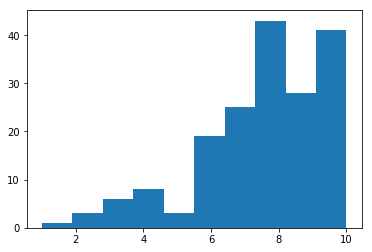

In [20]:
plt.hist(df.loc[df.len>1000].sort_values(by=['rating'])['rating'])

In [21]:
for x in range(1,11):
    print('{} comments in between {} < x < {}'.format(df.loc[(df.len < x*100) & (df.len > (x-1)*100)]['len'].count(), (x-1)*100, x*100))


774463 comments in between 0 < x < 100
50046 comments in between 100 < x < 200
9597 comments in between 200 < x < 300
3164 comments in between 300 < x < 400
1341 comments in between 400 < x < 500
647 comments in between 500 < x < 600
335 comments in between 600 < x < 700
181 comments in between 700 < x < 800
109 comments in between 800 < x < 900
67 comments in between 900 < x < 1000


In [22]:
for x in range(1,11):
    print('{} in between {} < x < {}'.format(df.loc[(df.len < x*10) & (df.len > (x-1)*10)]['len'].count(), (x-1)*10, x*10))


148367 in between 0 < x < 10
163138 in between 10 < x < 20
122092 in between 20 < x < 30
86474 in between 30 < x < 40
59438 in between 40 < x < 50
42048 in between 50 < x < 60
30054 in between 60 < x < 70
21784 in between 70 < x < 80
16526 in between 80 < x < 90
12587 in between 90 < x < 100


In [23]:
sample = df.loc[df.len<300]
for x in range(1,11):
    print('{} comments with {} rating is {} and has an average length of {}, and a standard deviation of {}'.format(sample.loc[sample.rating == x]['len'].count(), x, sample.loc[sample.rating == x]['len'].count(), round(sample.loc[sample.rating == x]['len'].mean(),2), round(sample.loc[sample.rating == x]['len'].std(),2)))

3919 comments with 1 rating is 3919 and has an average length of 41.41, and a standard deviation of 48.01
8490 comments with 2 rating is 8490 and has an average length of 41.7, and a standard deviation of 45.24
16349 comments with 3 rating is 16349 and has an average length of 42.37, and a standard deviation of 44.88
29469 comments with 4 rating is 29469 and has an average length of 41.52, and a standard deviation of 43.52
52333 comments with 5 rating is 52333 and has an average length of 39.32, and a standard deviation of 41.99
110167 comments with 6 rating is 110167 and has an average length of 38.65, and a standard deviation of 40.64
196285 comments with 7 rating is 196285 and has an average length of 36.32, and a standard deviation of 38.41
220833 comments with 8 rating is 220833 and has an average length of 36.64, and a standard deviation of 38.51
130351 comments with 9 rating is 130351 and has an average length of 38.98, and a standard deviation of 40.6
67344 comments with 10 rat

In [25]:
sample = df.loc[df.len>300]
for x in range(1,11):
    print('{} comments with {} rating is {} and has an average length of {}, and a standard deviation of {}'.format(sample.loc[sample.rating == x]['len'].count(), x, sample.loc[sample.rating == x]['len'].count(), round(sample.loc[sample.rating == x]['len'].mean(),2), round(sample.loc[sample.rating == x]['len'].std(),2)))

51 comments with 1 rating is 51 and has an average length of 444.47, and a standard deviation of 173.4
121 comments with 2 rating is 121 and has an average length of 462.94, and a standard deviation of 230.42
175 comments with 3 rating is 175 and has an average length of 467.59, and a standard deviation of 222.27
279 comments with 4 rating is 279 and has an average length of 465.3, and a standard deviation of 197.6
429 comments with 5 rating is 429 and has an average length of 433.52, and a standard deviation of 148.0
812 comments with 6 rating is 812 and has an average length of 446.53, and a standard deviation of 176.96
1104 comments with 7 rating is 1104 and has an average length of 461.46, and a standard deviation of 216.63
1336 comments with 8 rating is 1336 and has an average length of 460.09, and a standard deviation of 212.78
919 comments with 9 rating is 919 and has an average length of 476.12, and a standard deviation of 277.21
830 comments with 10 rating is 830 and has an av

## For a quick and dirty model I'll sperate the longer comments from the shorter and then put my prediction in to "boxes" as there isn't enough corrilation to predict a single rating

In [26]:
def first_try(var):
    if var < 300:
        if var > 40:
            return [1,2,3,4,10]
        if var > 37 & var < 40:
            return [5,6,9]
        if var <= 37:
            return [7,8]
    else:
        if var > 470:
            return [9,10]
        if var > 460 & var < 470:
            return [2,3,4,7,8]
        if var <= 460:
            return [1,5,6]

In [27]:
test['prediction'] = test.len.apply(first_try)

In [28]:
def check(a, b):
    if a in b:
        return True
    else:
        return False

In [29]:
test['value'] = test.apply(lambda row: check(row['rating'], row['prediction']), axis=1)

In [30]:
test.groupby('value').count()

,commenter,gameID,rating,comment,len,prediction
value,,,,,,
False,583,583,583,583,583,583
True,264,264,264,264,264,264


In [40]:
print('{}%'.format(round(test.loc[test.value == True].count()['len']/test.count()['len']*100,2)))

31.17%


## The model has a 31.17% accuracy rate but given that I am predicting that a comment falls into a box this is pretty bad lol